In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
import os
import numpy

In [3]:
# Define the paths to your data
base_dir = 'C:\\Users\\hp\\TensorFlowlite\\Main_dataset'
train_dir = os.path.join(base_dir, 'Dataset')

In [4]:
# Define data generators for training and testing
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,       # Normalize pixel values to [0, 1]
    validation_split=0.2     # Split data into 80% training and 20% validation
)

In [8]:
import os
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Define the data augmentation settings
data_augmentation = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define your class name and directory
class_name = "Clear_path"  # Change to the class name you want to augment
class_directory = f'C:\\Users\\hp\\TensorFlowlite\\Main_dataset\\Augmented'  # Where images to be augmented are..

# Create an output directory to store augmented images
output_directory = f'C:\\Users\\hp\\TensorFlowlite\\Main_dataset\\Dataset\\Clear_path'
os.makedirs(output_directory, exist_ok=True)

# Get a list of image filenames in the class directory
class_images = [os.path.join(class_directory, filename) for filename in os.listdir(class_directory)]

# Augment the images and save them to the output directory
for image_path in class_images:
    img = load_img(image_path)
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)

    i = 0
    for batch in data_augmentation.flow(x, batch_size=1, save_to_dir=output_directory, save_prefix=class_name, save_format='jpeg'):
        i += 1
        if i >= 10:  # Augment 10 times per image
            break


In [5]:
# Load and preprocess training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Adjust target size as needed
    batch_size=32,           # Adjust batch size as needed
    class_mode='categorical',
    subset='training'
)

Found 4732 images belonging to 7 classes.


In [6]:
# Load and preprocess testing data
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Adjust target size as needed
    batch_size=32,           # Adjust batch size as needed
    class_mode='categorical',
    subset='validation'
)

Found 1179 images belonging to 7 classes.


In [7]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # seven classes
])

In [8]:
# Compile the model with appropriate loss and optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [9]:
# Train the model on the training dataset
history = model.fit(train_generator, epochs=100, validation_data=validation_generator)

Epoch 1/100
148/148 [==============================] - 931s 6s/step - loss: 1.3572 - accuracy: 0.4934 - val_loss: 0.8352 - val_accuracy: 0.6947
Epoch 2/100
148/148 [==============================] - 818s 6s/step - loss: 0.7199 - accuracy: 0.7460 - val_loss: 0.7841 - val_accuracy: 0.7684
Epoch 3/100
148/148 [==============================] - 829s 6s/step - loss: 0.5781 - accuracy: 0.7948 - val_loss: 0.5627 - val_accuracy: 0.8499
Epoch 4/100
148/148 [==============================] - 842s 6s/step - loss: 0.5402 - accuracy: 0.8128 - val_loss: 0.5574 - val_accuracy: 0.8185
Epoch 5/100
148/148 [==============================] - 822s 6s/step - loss: 0.3705 - accuracy: 0.8745 - val_loss: 0.8372 - val_accuracy: 0.7718
Epoch 6/100
148/148 [==============================] - 826s 6s/step - loss: 0.2962 - accuracy: 0.8973 - val_loss: 0.6802 - val_accuracy: 0.8024
Epoch 7/100
148/148 [==============================] - 825s 6s/step - loss: 0.2563 - accuracy: 0.9125 - val_loss: 0.6825 - val_accuracy:

148/148 [==============================] - 803s 5s/step - loss: 0.0277 - accuracy: 0.9903 - val_loss: 1.2759 - val_accuracy: 0.8787
Epoch 58/100
148/148 [==============================] - 822s 6s/step - loss: 0.0101 - accuracy: 0.9962 - val_loss: 1.1578 - val_accuracy: 0.8923
Epoch 59/100
148/148 [==============================] - 803s 5s/step - loss: 0.0485 - accuracy: 0.9875 - val_loss: 1.0490 - val_accuracy: 0.8745
Epoch 60/100
148/148 [==============================] - 815s 5s/step - loss: 0.0560 - accuracy: 0.9825 - val_loss: 0.9327 - val_accuracy: 0.8711
Epoch 61/100
148/148 [==============================] - 810s 5s/step - loss: 0.0130 - accuracy: 0.9951 - val_loss: 0.8260 - val_accuracy: 0.9075
Epoch 62/100
148/148 [==============================] - 833s 6s/step - loss: 0.0449 - accuracy: 0.9869 - val_loss: 1.1364 - val_accuracy: 0.8719
Epoch 63/100
148/148 [==============================] - 1103s 7s/step - loss: 0.0315 - accuracy: 0.9905 - val_loss: 1.0892 - val_accuracy: 0.89

In [12]:
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f'Test accuracy: {test_accuracy:.2%}')

37/37 [==============================] - 93s 2s/step - loss: 2.2816 - accuracy: 0.8719
Test accuracy: 87.19%


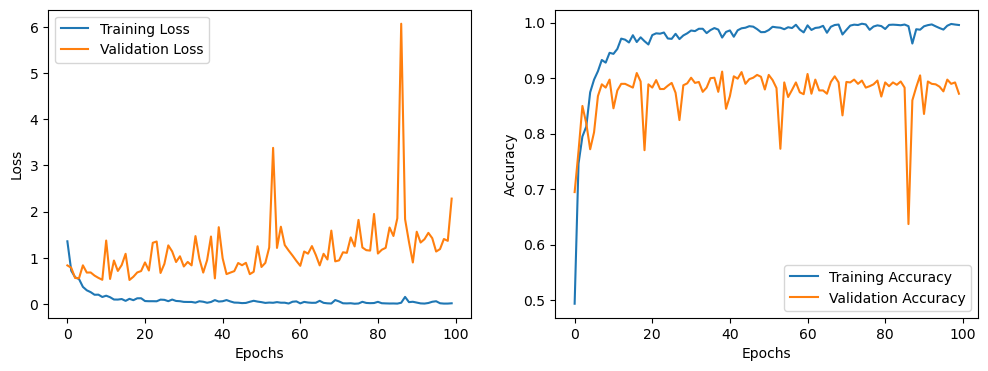

In [11]:
# Visualize training and validation loss and accuracy over epochs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [13]:
#Saving the model
model.save('my_model.keras')

In [ ]:
# Load the model
model = tf.keras.models.load_model('my_model.keras')

# Make predictions on new data
predictions = model.predict(x_test)